In [1]:
import os
import sys
import warnings

import pdb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

from utils import MySet

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise_update.pkl')

In [3]:
df.columns

Index(['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
       'gvtec2_dt', 'state_night', 'state_dawn', 'vm1', 'vd1', 'vm2', 'vd2',
       'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4'],
      dtype='object')

In [4]:
original = MySet('original', ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'])
tempo  = MySet('tempo', ['state_night', 'state_dawn'])
mdv1 = MySet('mdv1', ['vm1', 'vd1'])
mdv2 = MySet('mdv2', ['vm2', 'vd2'])
lag = MySet('lag', ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20'])

vtec = MySet('vtec', ['vtec'])
vtec_dt = MySet('vtec_dt', ['vtec_dt'])
vtec_dt2 = MySet('vtec_dt2', ['vtec_dt2'])
gvtec1 = MySet('gvtec1', ['gvtec1'])
gvtec1_dt = MySet('gvtec1_dt', ['gvtec1_dt'])
gvtec2 = MySet('gvtec2', ['gvtec2'])
gvtec2_dt = MySet('gvtec2_dt', ['gvtec2_dt'])
state_night = MySet('state_night', ['state_night'])
state_dawn = MySet('state_dawn', ['state_dawn'])
vm1 = MySet('vm1', ['vm1'])
vd1 = MySet('vd1', ['vd1'])
vm2 = MySet('vm2', ['vm2'])
vd2 = MySet('vd2', ['vd2'])
gvtec1_dt_lag_9 = MySet('gvtec1_dt_lag_9', ['gvtec1_dt_lag_9'])
gvtec2_dt_lag_20 = MySet('gvtec2_dt_lag_20', ['gvtec2_dt_lag_20'])

In [5]:
set_tests = [original,
             original-vtec,
             original-vtec_dt,
             original-gvtec1,
             original-gvtec1_dt,
             original-gvtec2,
             original-gvtec2_dt,
             original+tempo,
             original+gvtec1_dt_lag_9,
             original+gvtec2_dt_lag_20,
             original+lag,
             original+mdv1,
             original+mdv2,
             original+tempo+lag,
             original+tempo+mdv2,
             original+tempo+mdv2+lag,
             original+tempo+lag+mdv1+mdv2,
             vtec,
             vtec+gvtec1_dt_lag_9,
             vtec+gvtec2_dt_lag_20,
             vtec+vtec_dt+vtec_dt2,
             vtec+gvtec1+gvtec2,
             vtec+tempo,
             vtec+tempo+mdv1,
             vtec+tempo+lag,
             vtec+tempo+lag+mdv1,
             vtec+tempo+lag+mdv2,
             vtec+tempo+lag+mdv1+mdv2]

original
Error for the time series sample:
O erro quadrático médio foi: 0.008972
O erro quadrático total foi: 2.245543
O maior erro por previsão foi: 0.428537
O erro relativo foi: 23.256175%
O número de verdadeiros negativos foi: 280
O número de verdadeiros positivos foi: 127
O número de falsos negativos foi: 26
O número de falsos positivos foi: 129
O POD foi: 0.830065
O FAR foi: 0.503906
A ACC foi: 0.724199
O kappa foi: 0.074920
precission: 0.496094
recal: 0.830065
f1: 0.621027


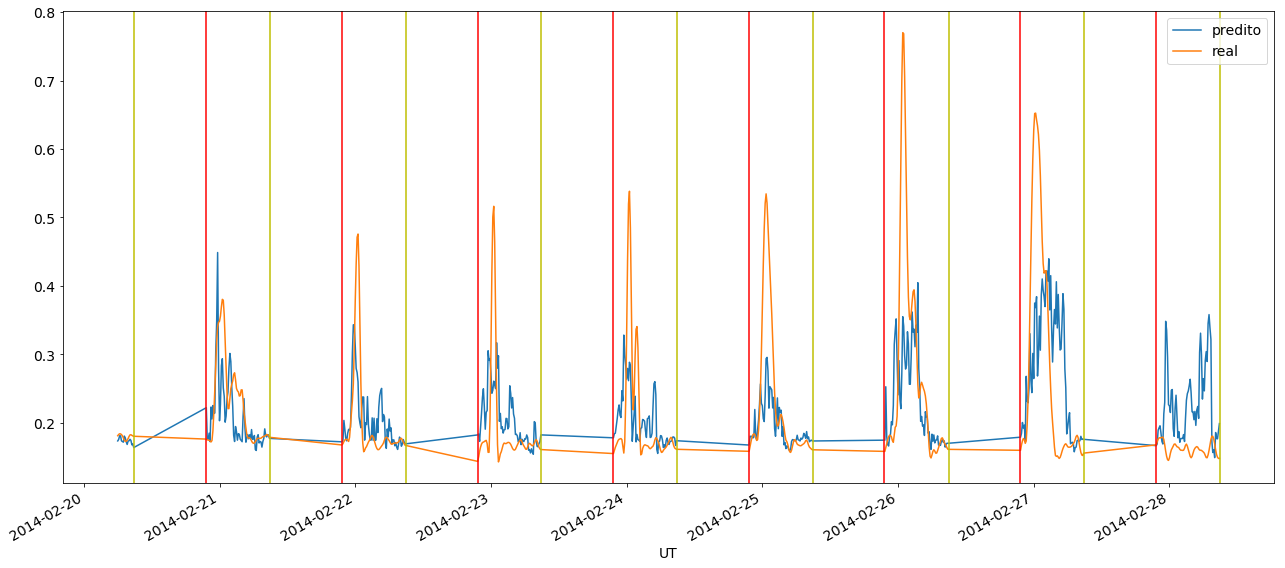


original - vtec
Error for the time series sample:
O erro quadrático médio foi: 0.009242
O erro quadrático total foi: 2.279083
O maior erro por previsão foi: 0.434195
O erro relativo foi: 26.866546%
O número de verdadeiros negativos foi: 235
O número de verdadeiros positivos foi: 115
O número de falsos negativos foi: 38
O número de falsos positivos foi: 174
O POD foi: 0.751634
O FAR foi: 0.602076
A ACC foi: 0.622776
O kappa foi: 0.091628
precission: 0.397924
recal: 0.751634
f1: 0.520362


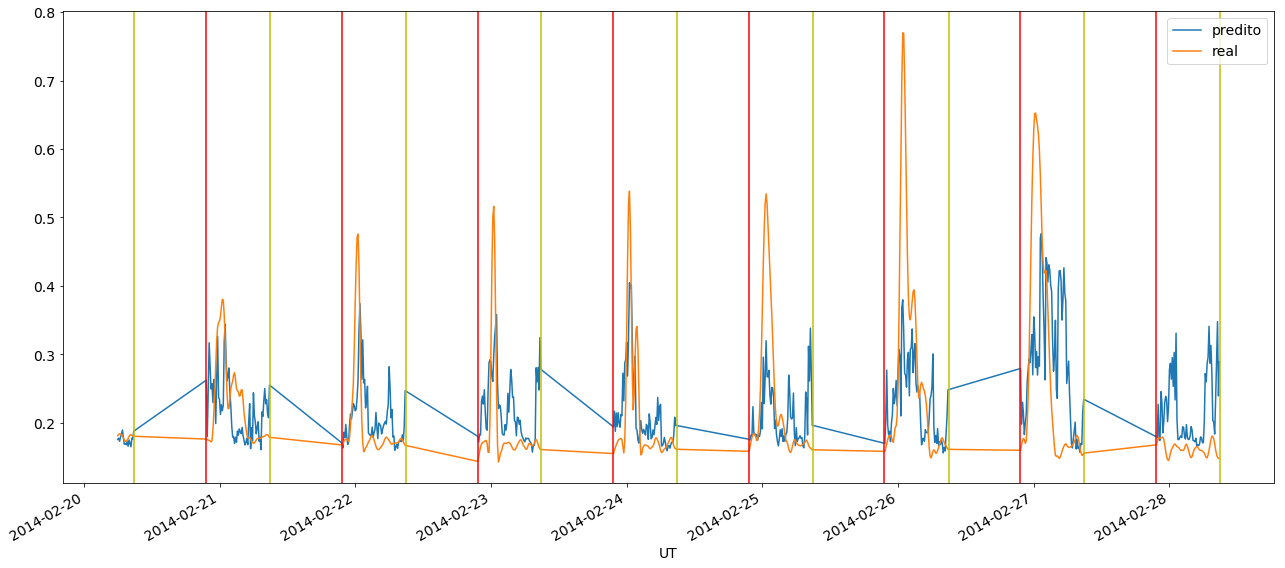


original - vtec_dt
Error for the time series sample:
O erro quadrático médio foi: 0.009156
O erro quadrático total foi: 2.268439
O maior erro por previsão foi: 0.434009
O erro relativo foi: 22.919792%
O número de verdadeiros negativos foi: 295
O número de verdadeiros positivos foi: 121
O número de falsos negativos foi: 32
O número de falsos positivos foi: 114
O POD foi: 0.790850
O FAR foi: 0.485106
A ACC foi: 0.740214
O kappa foi: 0.073562
precission: 0.514894
recal: 0.790850
f1: 0.623711


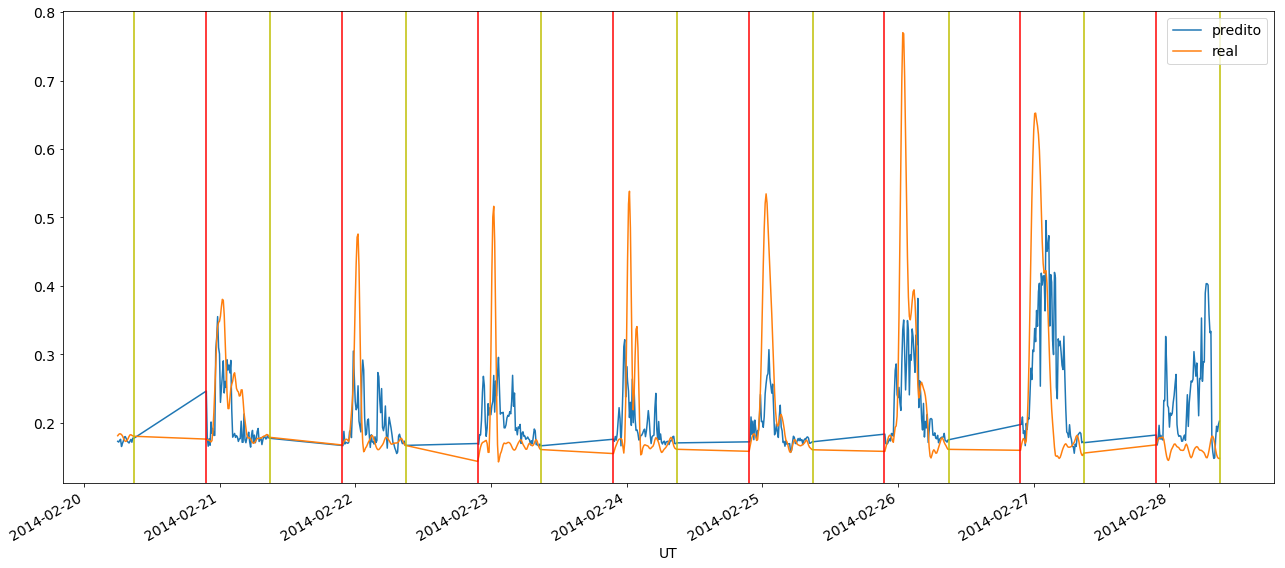


original - gvtec1
Error for the time series sample:
O erro quadrático médio foi: 0.009832
O erro quadrático total foi: 2.350684
O maior erro por previsão foi: 0.418560
O erro relativo foi: 23.694245%
O número de verdadeiros negativos foi: 268
O número de verdadeiros positivos foi: 121
O número de falsos negativos foi: 32
O número de falsos positivos foi: 141
O POD foi: 0.790850
O FAR foi: 0.538168
A ACC foi: 0.692171
O kappa foi: 0.081170
precission: 0.461832
recal: 0.790850
f1: 0.583133


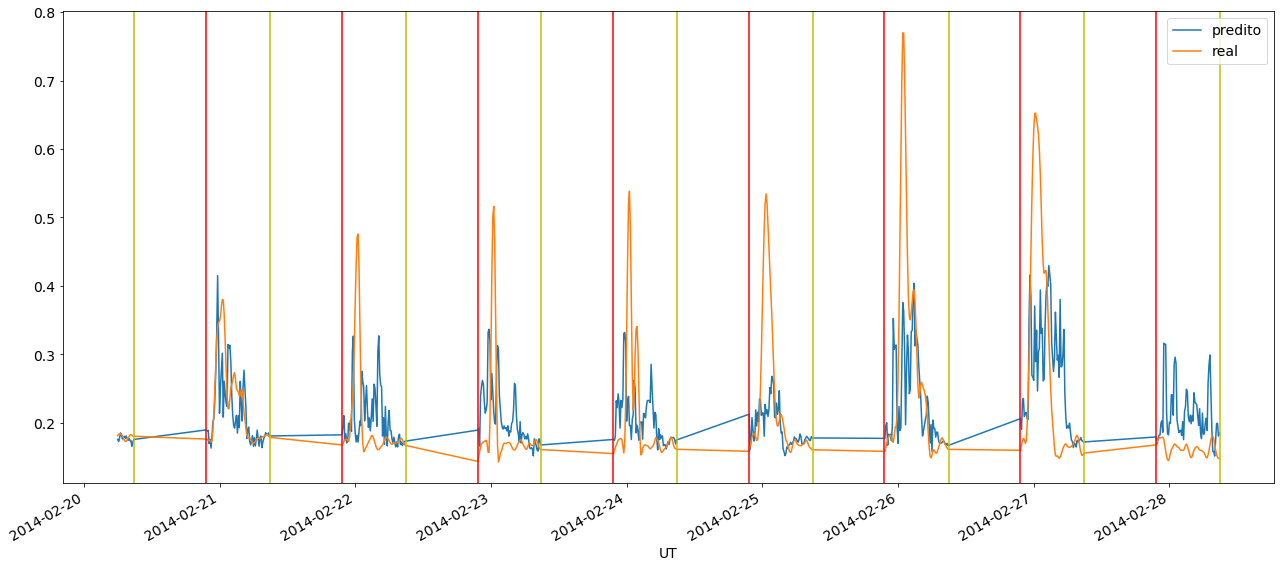


original - gvtec1_dt
Error for the time series sample:
O erro quadrático médio foi: 0.008740
O erro quadrático total foi: 2.216272
O maior erro por previsão foi: 0.485911
O erro relativo foi: 20.607318%
O número de verdadeiros negativos foi: 311
O número de verdadeiros positivos foi: 116
O número de falsos negativos foi: 37
O número de falsos positivos foi: 98
O POD foi: 0.758170
O FAR foi: 0.457944
A ACC foi: 0.759786
O kappa foi: 0.072425
precission: 0.542056
recal: 0.758170
f1: 0.632153


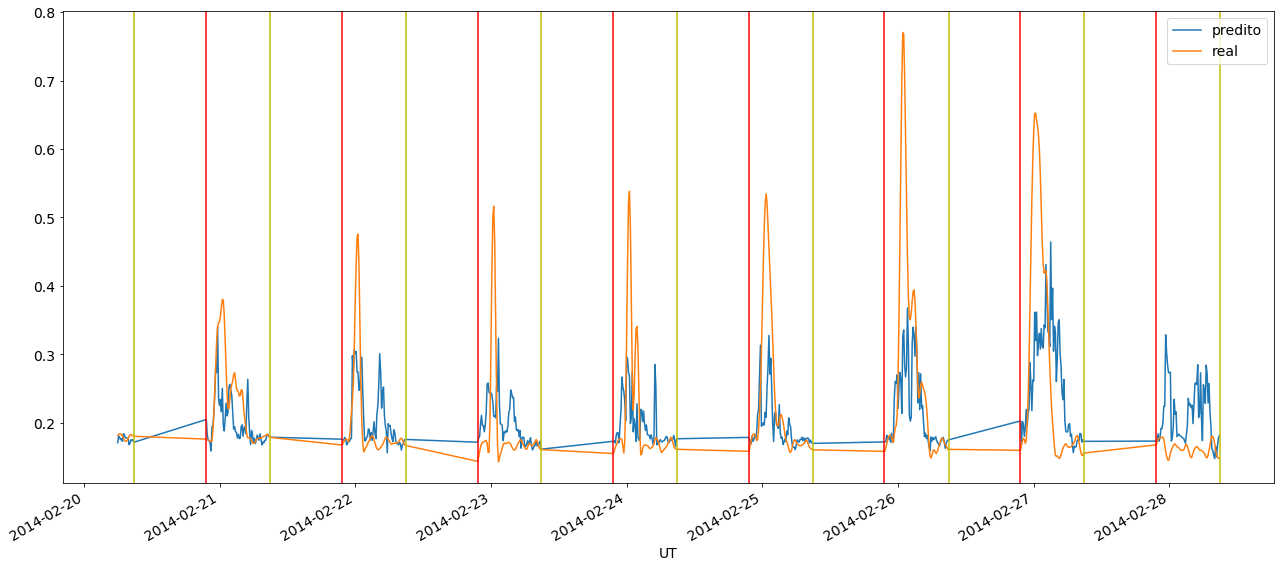


original - gvtec2
Error for the time series sample:
O erro quadrático médio foi: 0.010395
O erro quadrático total foi: 2.416992
O maior erro por previsão foi: 0.525759
O erro relativo foi: 27.793542%
O número de verdadeiros negativos foi: 226
O número de verdadeiros positivos foi: 137
O número de falsos negativos foi: 16
O número de falsos positivos foi: 183
O POD foi: 0.895425
O FAR foi: 0.571875
A ACC foi: 0.645907
O kappa foi: 0.090826
precission: 0.428125
recal: 0.895425
f1: 0.579281


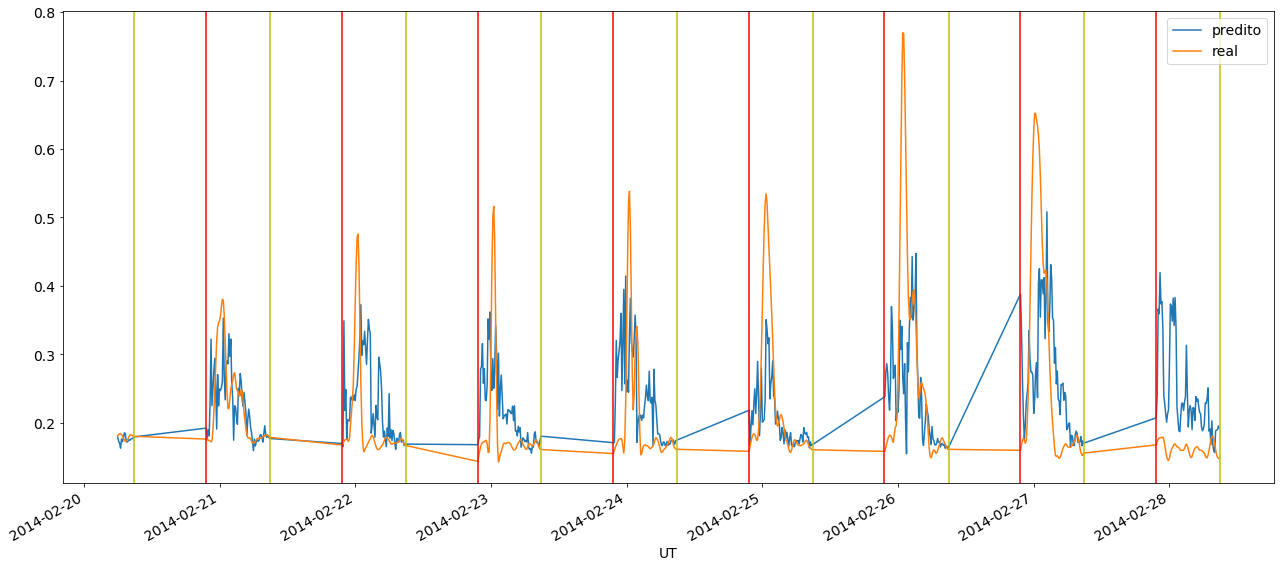


original - gvtec2_dt
Error for the time series sample:
O erro quadrático médio foi: 0.009863
O erro quadrático total foi: 2.354386
O maior erro por previsão foi: 0.531865
O erro relativo foi: 24.609674%
O número de verdadeiros negativos foi: 274
O número de verdadeiros positivos foi: 123
O número de falsos negativos foi: 30
O número de falsos positivos foi: 135
O POD foi: 0.803922
O FAR foi: 0.523256
A ACC foi: 0.706406
O kappa foi: 0.078599
precission: 0.476744
recal: 0.803922
f1: 0.598540


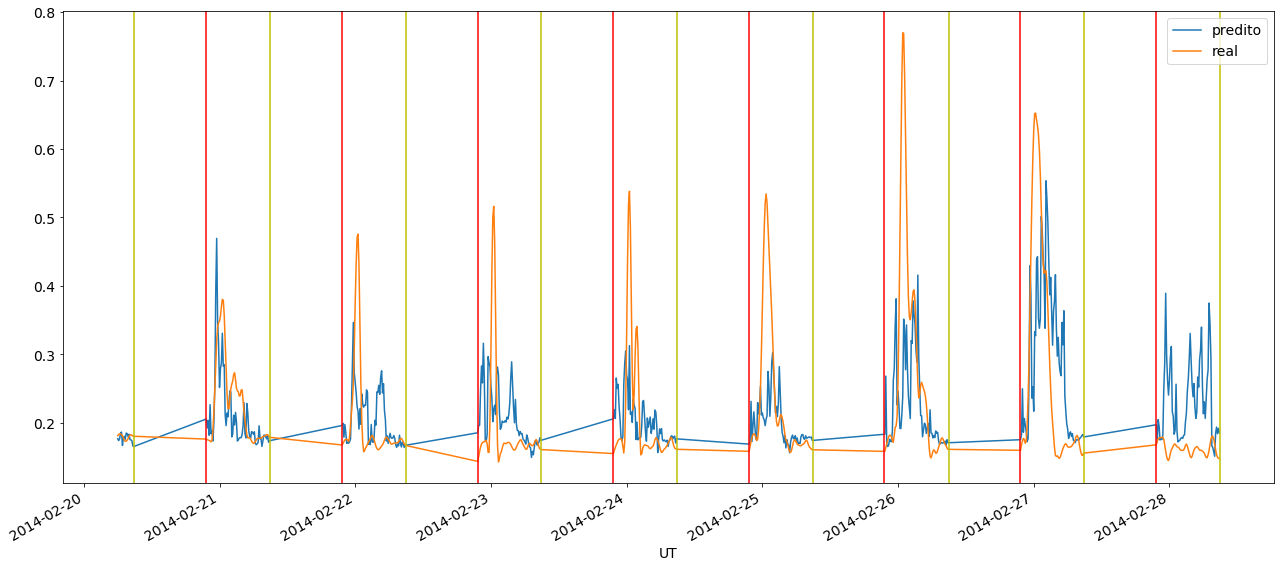


original + tempo
Error for the time series sample:
O erro quadrático médio foi: 0.007881
O erro quadrático total foi: 2.104549
O maior erro por previsão foi: 0.464419
O erro relativo foi: 20.658569%
O número de verdadeiros negativos foi: 277
O número de verdadeiros positivos foi: 117
O número de falsos negativos foi: 36
O número de falsos positivos foi: 132
O POD foi: 0.764706
O FAR foi: 0.530120
A ACC foi: 0.701068
O kappa foi: 0.080470
precission: 0.469880
recal: 0.764706
f1: 0.582090


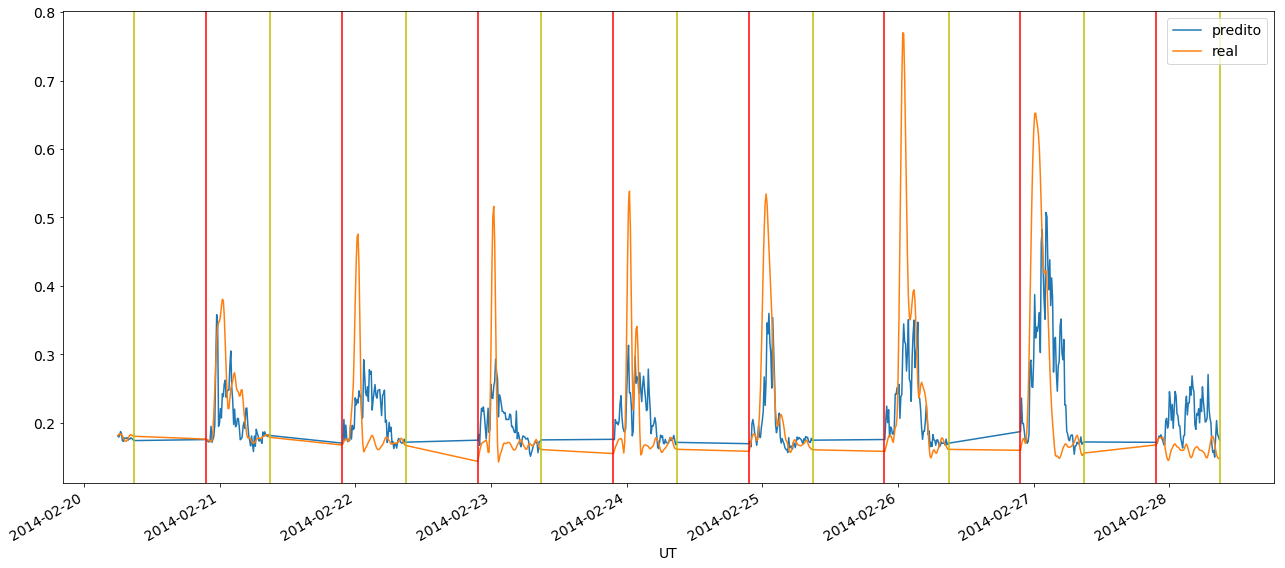


original + gvtec1_dt_lag_9
Error for the time series sample:
O erro quadrático médio foi: 0.008197
O erro quadrático total foi: 2.146332
O maior erro por previsão foi: 0.453893
O erro relativo foi: 22.092682%
O número de verdadeiros negativos foi: 261
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 148
O POD foi: 0.797386
O FAR foi: 0.548148
A ACC foi: 0.681495
O kappa foi: 0.082785
precission: 0.451852
recal: 0.797386
f1: 0.576832


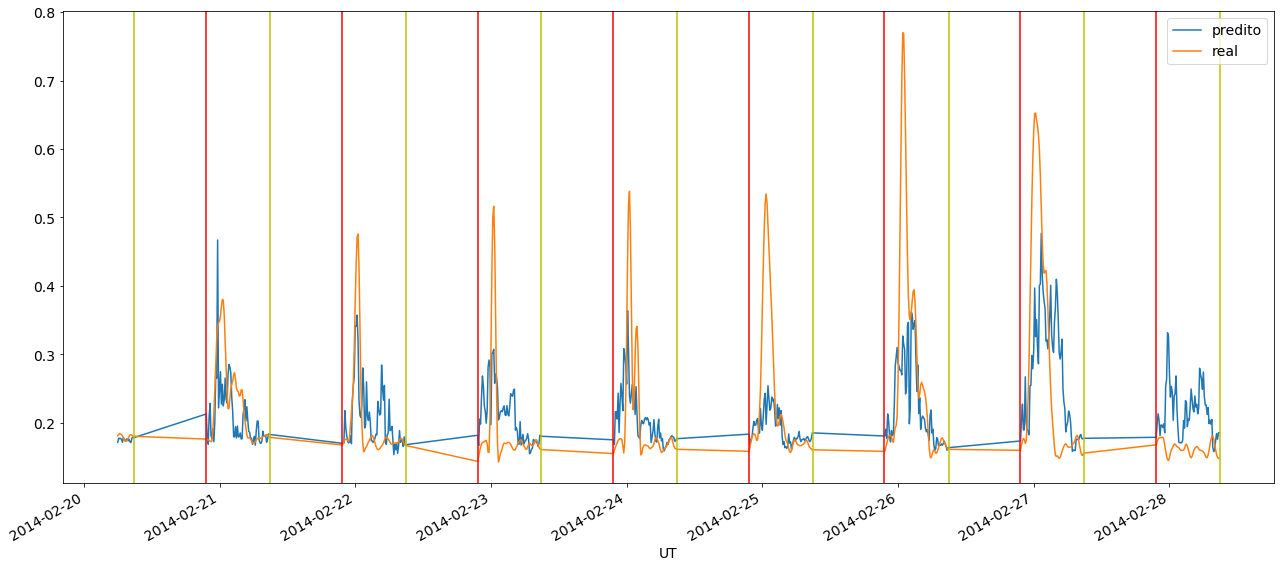


original + gvtec2_dt_lag_20
Error for the time series sample:
O erro quadrático médio foi: 0.007995
O erro quadrático total foi: 2.119777
O maior erro por previsão foi: 0.455153
O erro relativo foi: 21.131644%
O número de verdadeiros negativos foi: 282
O número de verdadeiros positivos foi: 127
O número de falsos negativos foi: 26
O número de falsos positivos foi: 127
O POD foi: 0.830065
O FAR foi: 0.500000
A ACC foi: 0.727758
O kappa foi: 0.074280
precission: 0.500000
recal: 0.830065
f1: 0.624079


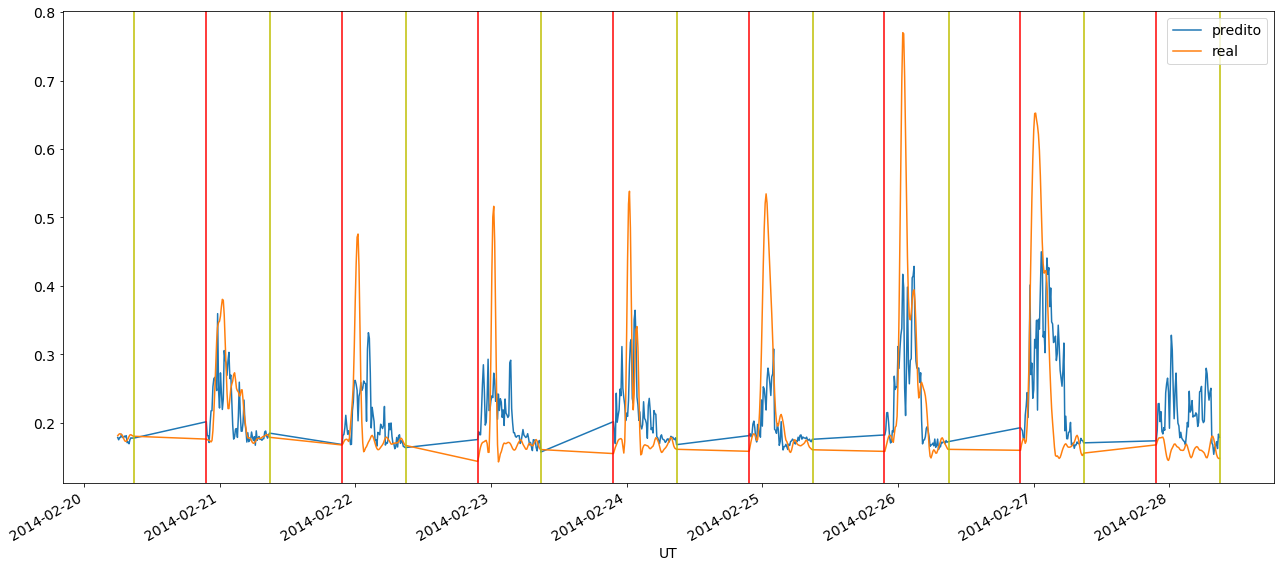


original + lag
Error for the time series sample:
O erro quadrático médio foi: 0.007595
O erro quadrático total foi: 2.066031
O maior erro por previsão foi: 0.424791
O erro relativo foi: 22.216975%
O número de verdadeiros negativos foi: 260
O número de verdadeiros positivos foi: 133
O número de falsos negativos foi: 20
O número de falsos positivos foi: 149
O POD foi: 0.869281
O FAR foi: 0.528369
A ACC foi: 0.699288
O kappa foi: 0.079207
precission: 0.471631
recal: 0.869281
f1: 0.611494


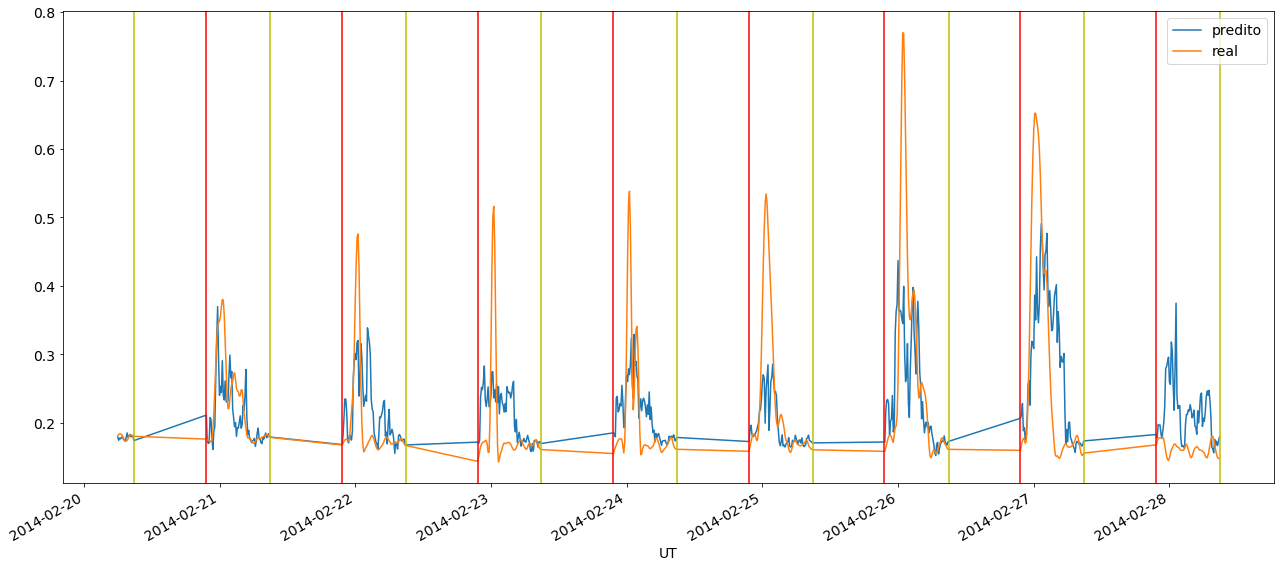


original + mdv1
Error for the time series sample:
O erro quadrático médio foi: 0.007977
O erro quadrático total foi: 2.117382
O maior erro por previsão foi: 0.386666
O erro relativo foi: 24.812018%
O número de verdadeiros negativos foi: 250
O número de verdadeiros positivos foi: 136
O número de falsos negativos foi: 17
O número de falsos positivos foi: 159
O POD foi: 0.888889
O FAR foi: 0.538983
A ACC foi: 0.686833
O kappa foi: 0.081920
precission: 0.461017
recal: 0.888889
f1: 0.607143


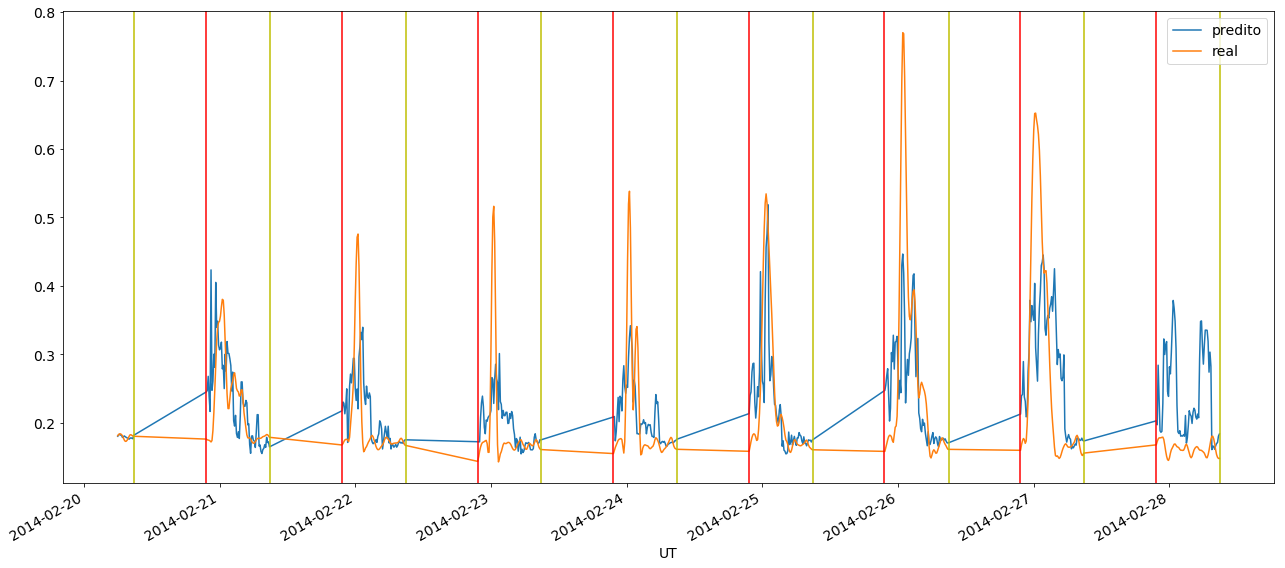


original + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.008182
O erro quadrático total foi: 2.144296
O maior erro por previsão foi: 0.427353
O erro relativo foi: 23.386626%
O número de verdadeiros negativos foi: 232
O número de verdadeiros positivos foi: 134
O número de falsos negativos foi: 19
O número de falsos positivos foi: 177
O POD foi: 0.875817
O FAR foi: 0.569132
A ACC foi: 0.651246
O kappa foi: 0.089050
precission: 0.430868
recal: 0.875817
f1: 0.577586


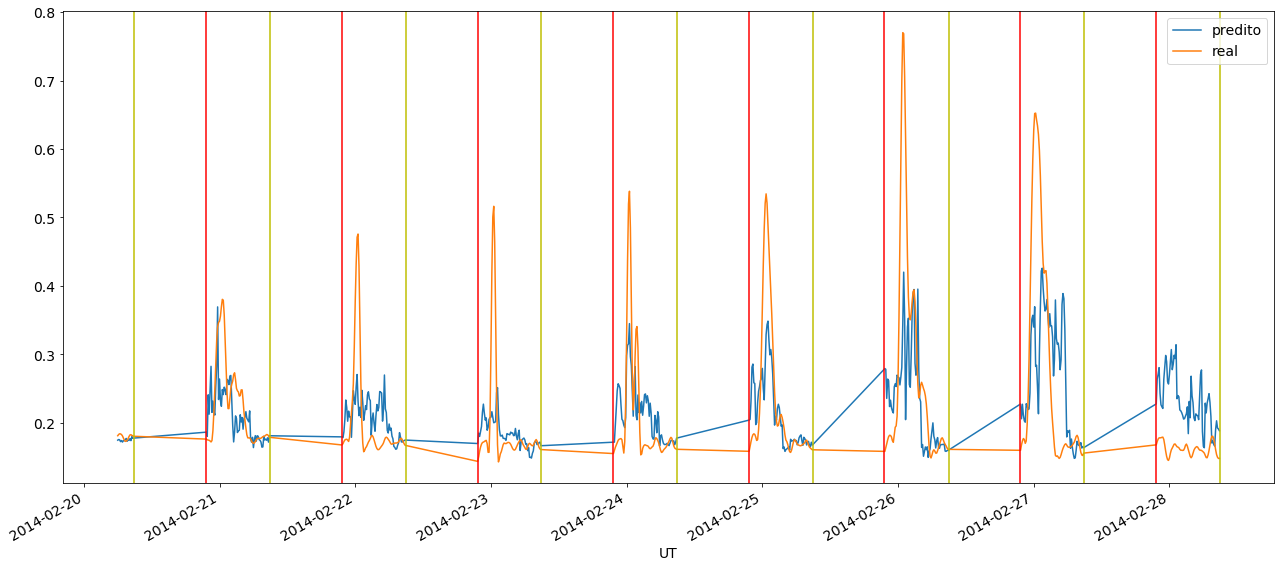


original + tempo + lag
Error for the time series sample:
O erro quadrático médio foi: 0.006331
O erro quadrático total foi: 1.886328
O maior erro por previsão foi: 0.448542
O erro relativo foi: 18.584346%
O número de verdadeiros negativos foi: 302
O número de verdadeiros positivos foi: 130
O número de falsos negativos foi: 23
O número de falsos positivos foi: 107
O POD foi: 0.849673
O FAR foi: 0.451477
A ACC foi: 0.768683
O kappa foi: 0.066033
precission: 0.548523
recal: 0.849673
f1: 0.666667


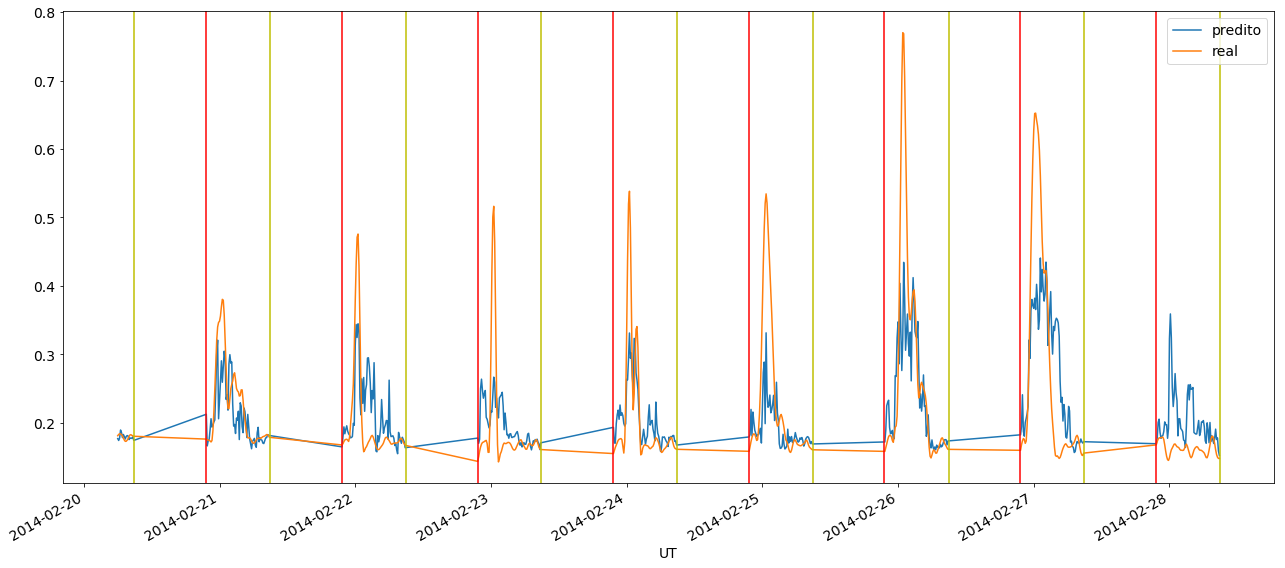


original + tempo + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.007702
O erro quadrático total foi: 2.080574
O maior erro por previsão foi: 0.424944
O erro relativo foi: 23.127309%
O número de verdadeiros negativos foi: 233
O número de verdadeiros positivos foi: 134
O número de falsos negativos foi: 19
O número de falsos positivos foi: 176
O POD foi: 0.875817
O FAR foi: 0.567742
A ACC foi: 0.653025
O kappa foi: 0.088686
precission: 0.432258
recal: 0.875817
f1: 0.578834


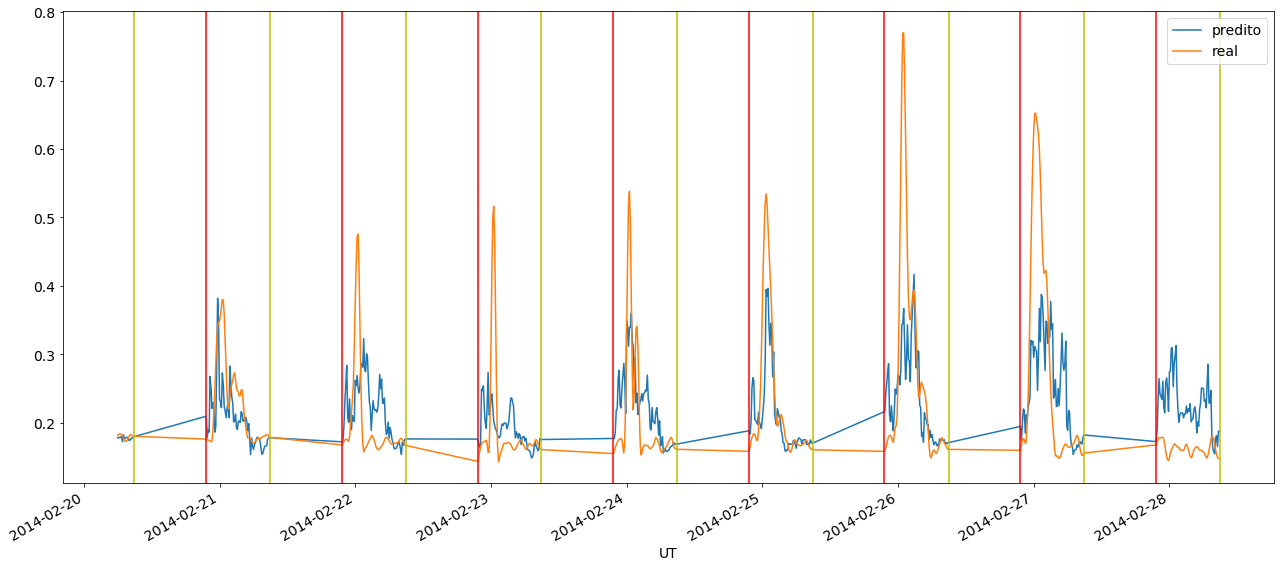


original + tempo + mdv2 + lag
Error for the time series sample:
O erro quadrático médio foi: 0.007384
O erro quadrático total foi: 2.037061
O maior erro por previsão foi: 0.434926
O erro relativo foi: 21.756265%
O número de verdadeiros negativos foi: 275
O número de verdadeiros positivos foi: 131
O número de falsos negativos foi: 22
O número de falsos positivos foi: 134
O POD foi: 0.856209
O FAR foi: 0.505660
A ACC foi: 0.722420
O kappa foi: 0.074733
precission: 0.494340
recal: 0.856209
f1: 0.626794


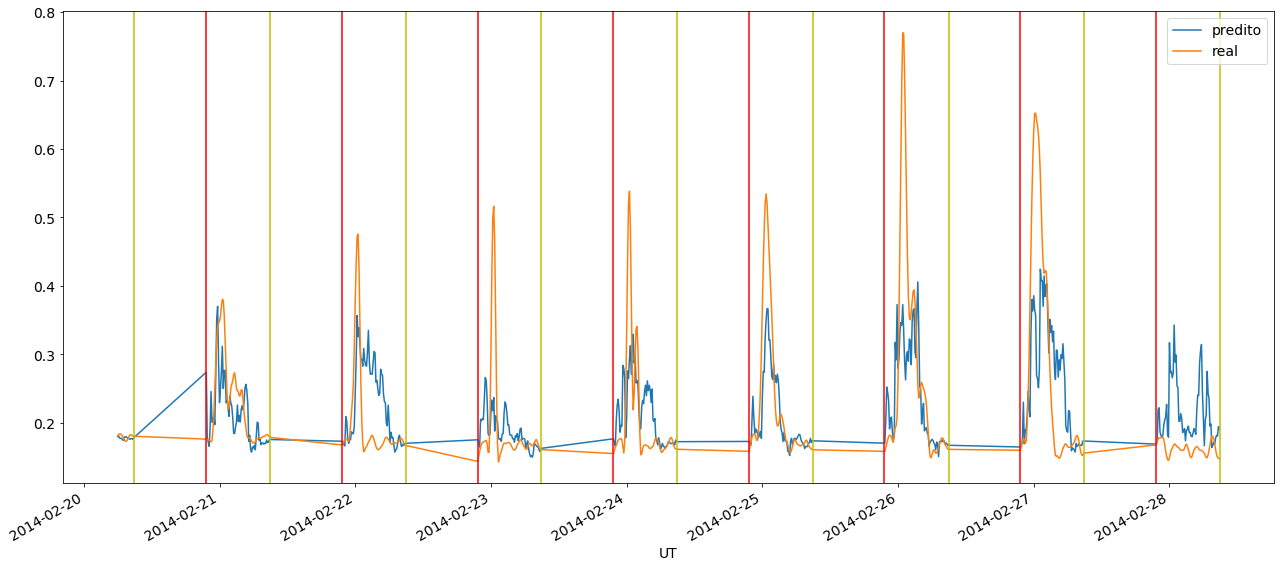


original + tempo + lag + mdv1 + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.008442
O erro quadrático total foi: 2.178164
O maior erro por previsão foi: 0.393882
O erro relativo foi: 26.300306%
O número de verdadeiros negativos foi: 257
O número de verdadeiros positivos foi: 136
O número de falsos negativos foi: 17
O número de falsos positivos foi: 152
O POD foi: 0.888889
O FAR foi: 0.527778
A ACC foi: 0.699288
O kappa foi: 0.079283
precission: 0.472222
recal: 0.888889
f1: 0.616780


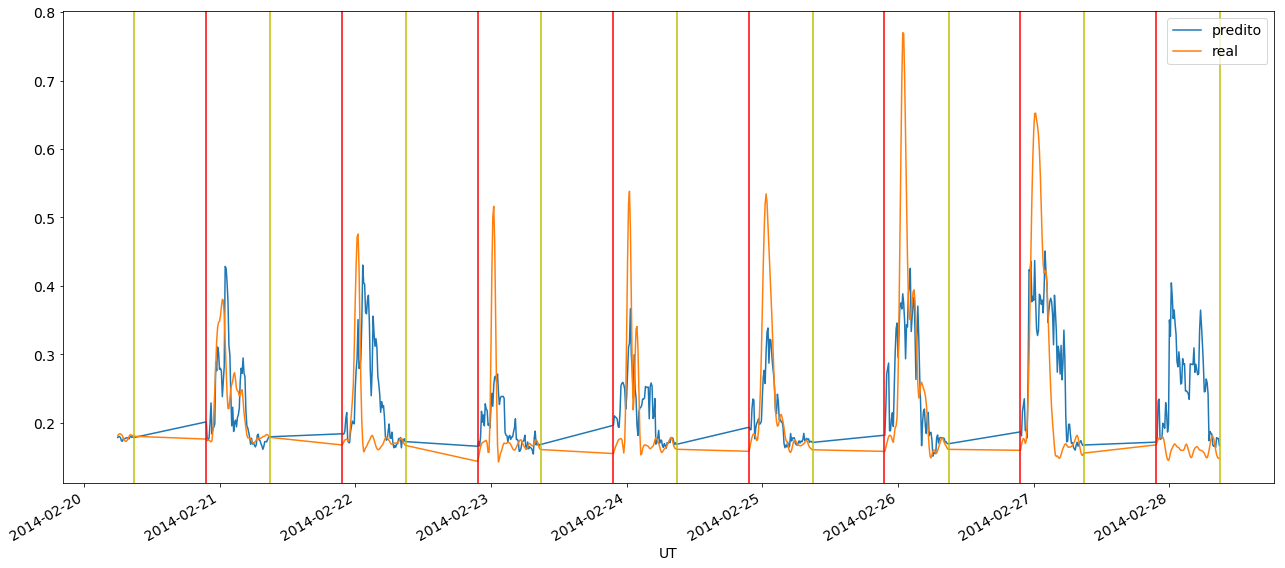


vtec
Error for the time series sample:
O erro quadrático médio foi: 0.012583
O erro quadrático total foi: 2.659224
O maior erro por previsão foi: 0.578514
O erro relativo foi: 26.417356%
O número de verdadeiros negativos foi: 273
O número de verdadeiros positivos foi: 92
O número de falsos negativos foi: 61
O número de falsos positivos foi: 136
O POD foi: 0.601307
O FAR foi: 0.596491
A ACC foi: 0.649466
O kappa foi: 0.092340
precission: 0.403509
recal: 0.601307
f1: 0.482940


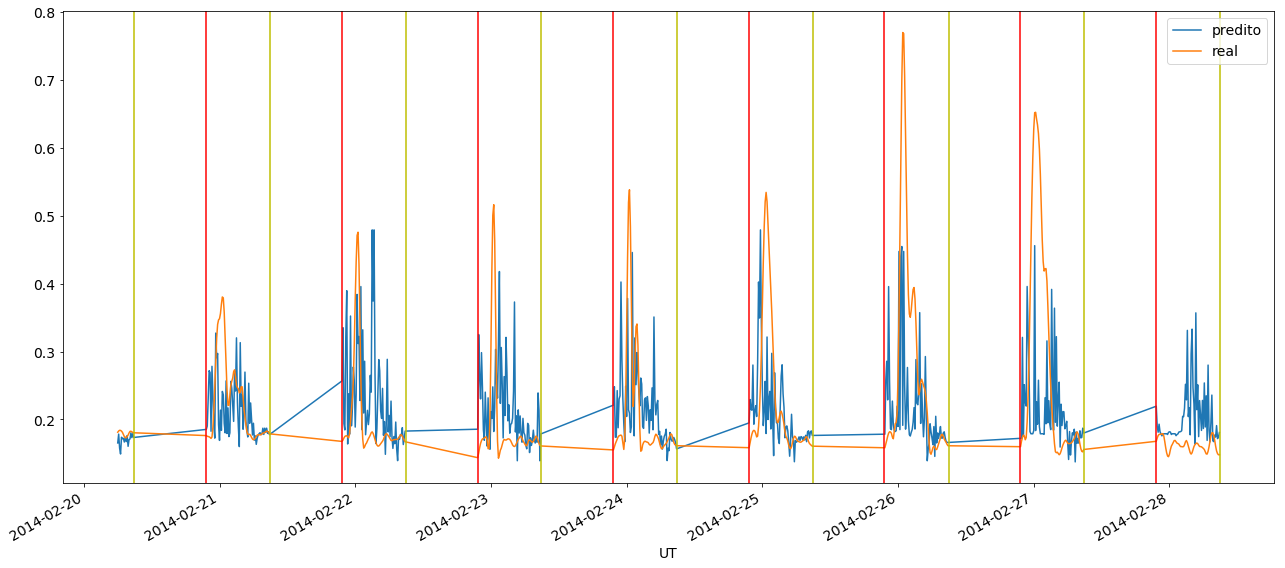


vtec + gvtec1_dt_lag_9
Error for the time series sample:
O erro quadrático médio foi: 0.010562
O erro quadrático total foi: 2.436360
O maior erro por previsão foi: 0.499964
O erro relativo foi: 29.495741%
O número de verdadeiros negativos foi: 212
O número de verdadeiros positivos foi: 126
O número de falsos negativos foi: 27
O número de falsos positivos foi: 197
O POD foi: 0.823529
O FAR foi: 0.609907
A ACC foi: 0.601423
O kappa foi: 0.096712
precission: 0.390093
recal: 0.823529
f1: 0.529412


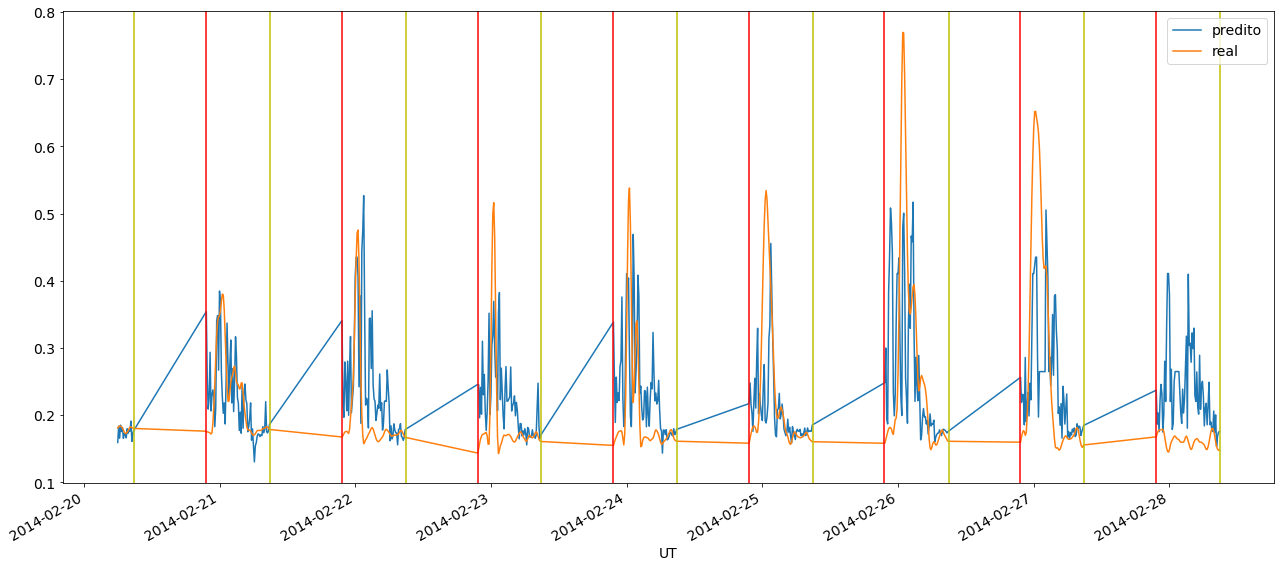


vtec + gvtec2_dt_lag_20
Error for the time series sample:
O erro quadrático médio foi: 0.008212
O erro quadrático total foi: 2.148312
O maior erro por previsão foi: 0.482462
O erro relativo foi: 22.902276%
O número de verdadeiros negativos foi: 290
O número de verdadeiros positivos foi: 113
O número de falsos negativos foi: 40
O número de falsos positivos foi: 119
O POD foi: 0.738562
O FAR foi: 0.512931
A ACC foi: 0.717082
O kappa foi: 0.079302
precission: 0.487069
recal: 0.738562
f1: 0.587013


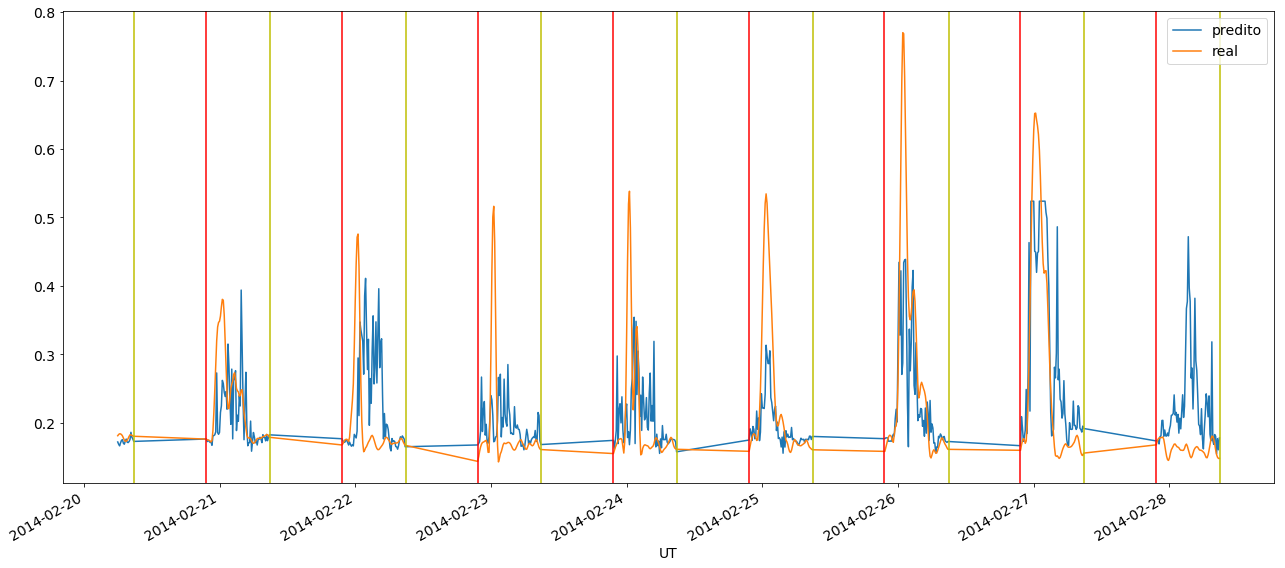


vtec + vtec_dt + vtec_dt2
Error for the time series sample:
O erro quadrático médio foi: 0.010385
O erro quadrático total foi: 2.415833
O maior erro por previsão foi: 0.460291
O erro relativo foi: 27.855574%
O número de verdadeiros negativos foi: 232
O número de verdadeiros positivos foi: 134
O número de falsos negativos foi: 19
O número de falsos positivos foi: 177
O POD foi: 0.875817
O FAR foi: 0.569132
A ACC foi: 0.651246
O kappa foi: 0.089050
precission: 0.430868
recal: 0.875817
f1: 0.577586


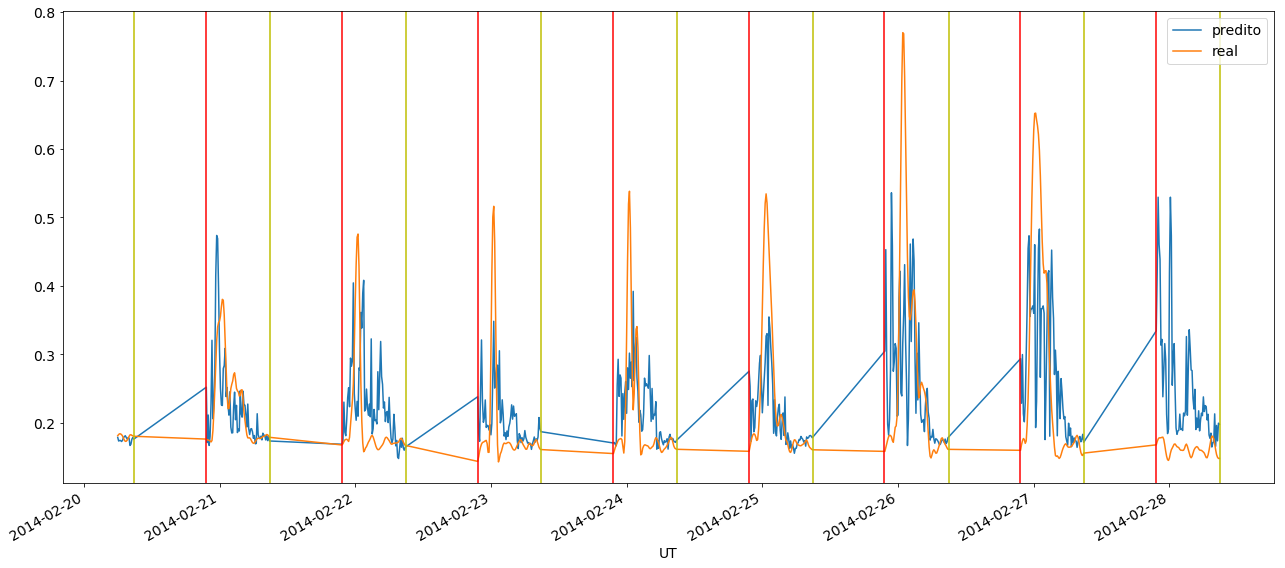


vtec + gvtec1 + gvtec2
Error for the time series sample:
O erro quadrático médio foi: 0.010963
O erro quadrático total foi: 2.482230
O maior erro por previsão foi: 0.516670
O erro relativo foi: 22.050325%
O número de verdadeiros negativos foi: 321
O número de verdadeiros positivos foi: 95
O número de falsos negativos foi: 58
O número de falsos positivos foi: 88
O POD foi: 0.620915
O FAR foi: 0.480874
A ACC foi: 0.740214
O kappa foi: 0.085416
precission: 0.519126
recal: 0.620915
f1: 0.565476


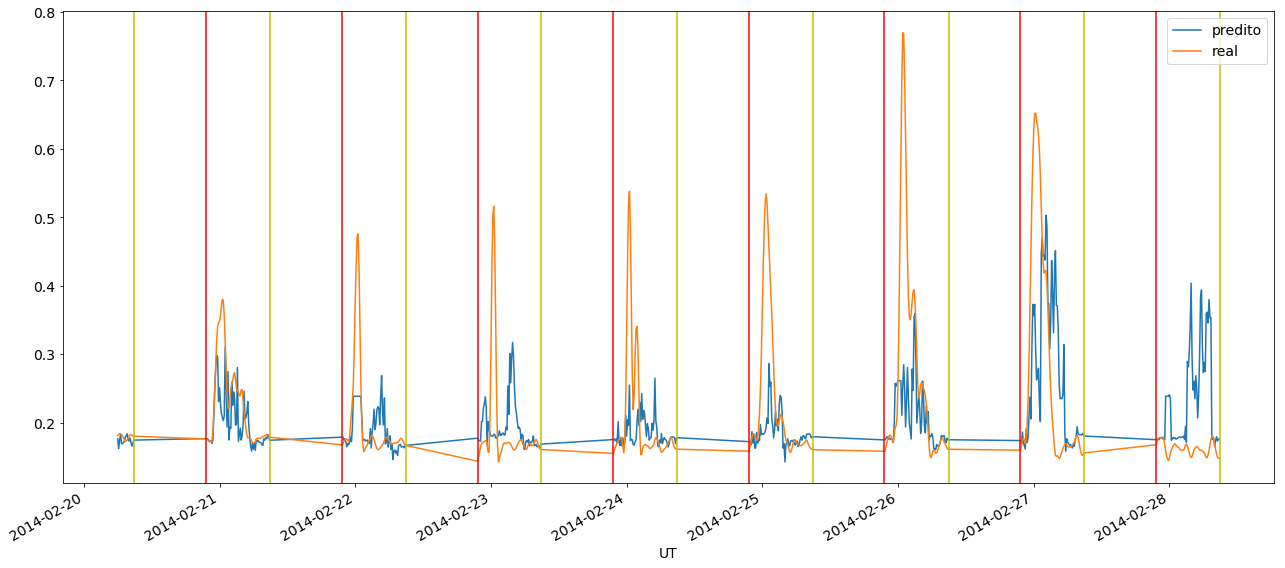


vtec + tempo
Error for the time series sample:
O erro quadrático médio foi: 0.012133
O erro quadrático total foi: 2.611275
O maior erro por previsão foi: 0.497391
O erro relativo foi: 27.445313%
O número de verdadeiros negativos foi: 283
O número de verdadeiros positivos foi: 118
O número de falsos negativos foi: 35
O número de falsos positivos foi: 126
O POD foi: 0.771242
O FAR foi: 0.516393
A ACC foi: 0.713523
O kappa foi: 0.078434
precission: 0.483607
recal: 0.771242
f1: 0.594458


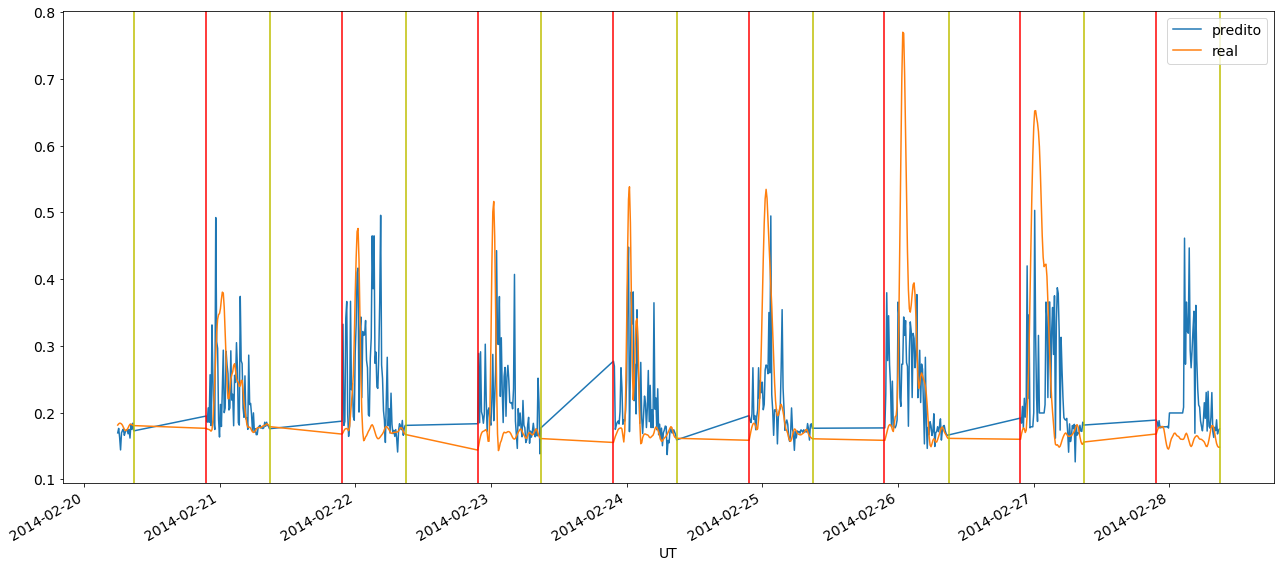


vtec + tempo + mdv1
Error for the time series sample:
O erro quadrático médio foi: 0.015428
O erro quadrático total foi: 2.944545
O maior erro por previsão foi: 0.432386
O erro relativo foi: 35.559322%
O número de verdadeiros negativos foi: 227
O número de verdadeiros positivos foi: 131
O número de falsos negativos foi: 22
O número de falsos positivos foi: 182
O POD foi: 0.856209
O FAR foi: 0.581470
A ACC foi: 0.637011
O kappa foi: 0.091298
precission: 0.418530
recal: 0.856209
f1: 0.562232


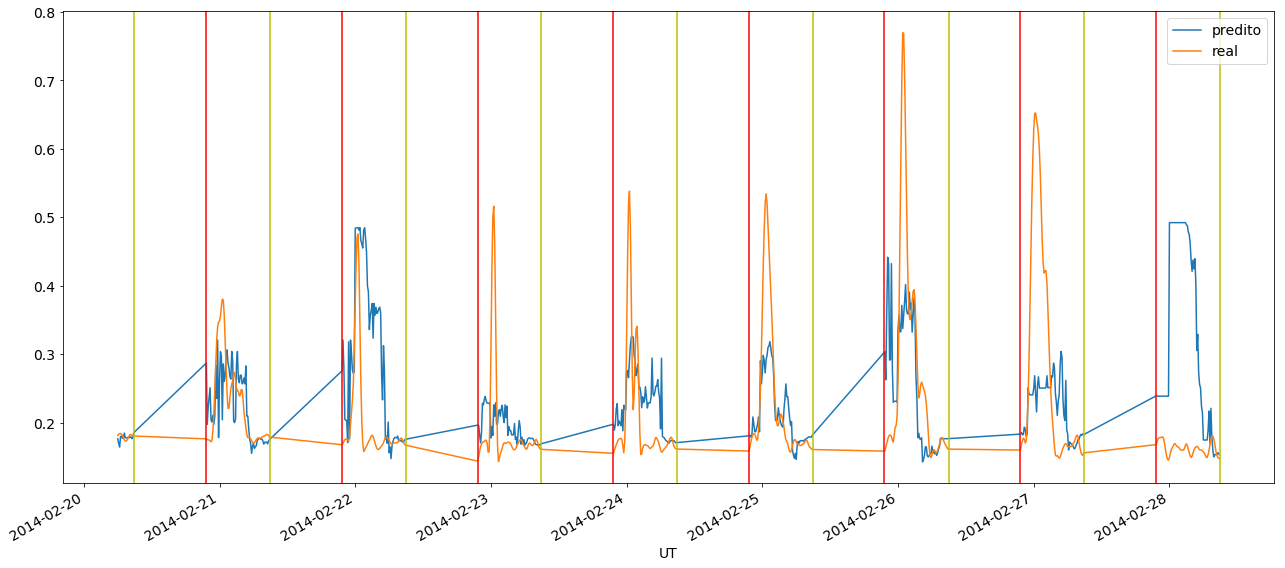


vtec + tempo + lag
Error for the time series sample:
O erro quadrático médio foi: 0.008345
O erro quadrático total foi: 2.165602
O maior erro por previsão foi: 0.488491
O erro relativo foi: 24.892920%
O número de verdadeiros negativos foi: 278
O número de verdadeiros positivos foi: 127
O número de falsos negativos foi: 26
O número de falsos positivos foi: 131
O POD foi: 0.830065
O FAR foi: 0.507752
A ACC foi: 0.720641
O kappa foi: 0.075559
precission: 0.492248
recal: 0.830065
f1: 0.618005


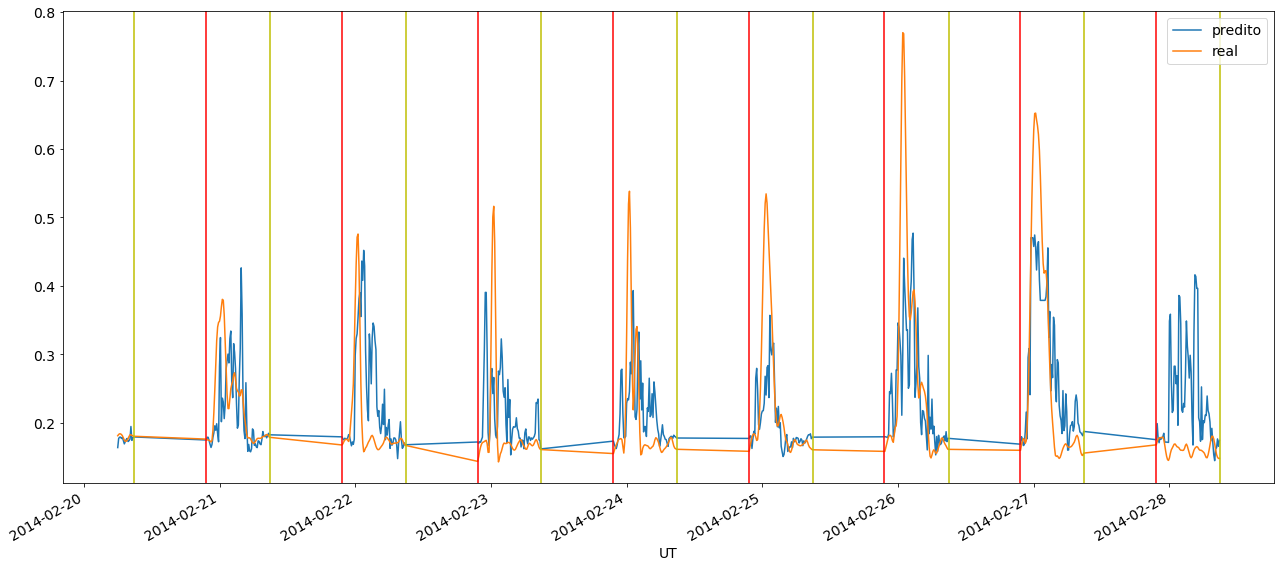


vtec + tempo + lag + mdv1
Error for the time series sample:
O erro quadrático médio foi: 0.011476
O erro quadrático total foi: 2.539580
O maior erro por previsão foi: 0.413890
O erro relativo foi: 28.745392%
O número de verdadeiros negativos foi: 292
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 117
O POD foi: 0.797386
O FAR foi: 0.489540
A ACC foi: 0.736655
O kappa foi: 0.073853
precission: 0.510460
recal: 0.797386
f1: 0.622449


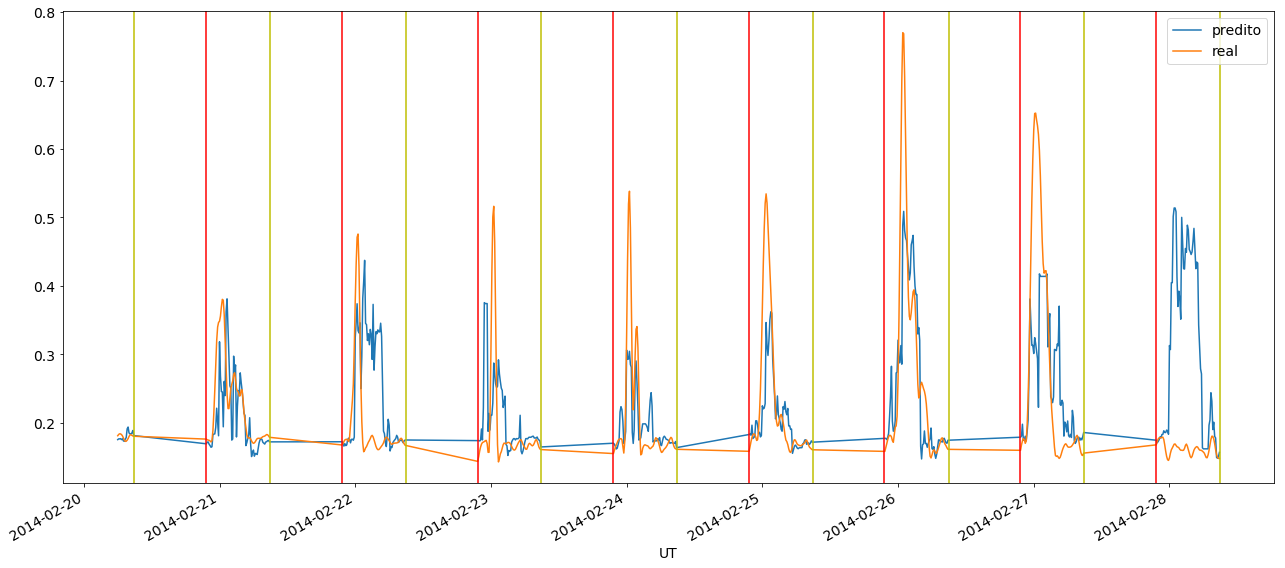


vtec + tempo + lag + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.009473
O erro quadrático total foi: 2.307327
O maior erro por previsão foi: 0.435842
O erro relativo foi: 23.825457%
O número de verdadeiros negativos foi: 271
O número de verdadeiros positivos foi: 116
O número de falsos negativos foi: 37
O número de falsos positivos foi: 138
O POD foi: 0.758170
O FAR foi: 0.543307
A ACC foi: 0.688612
O kappa foi: 0.082430
precission: 0.456693
recal: 0.758170
f1: 0.570025


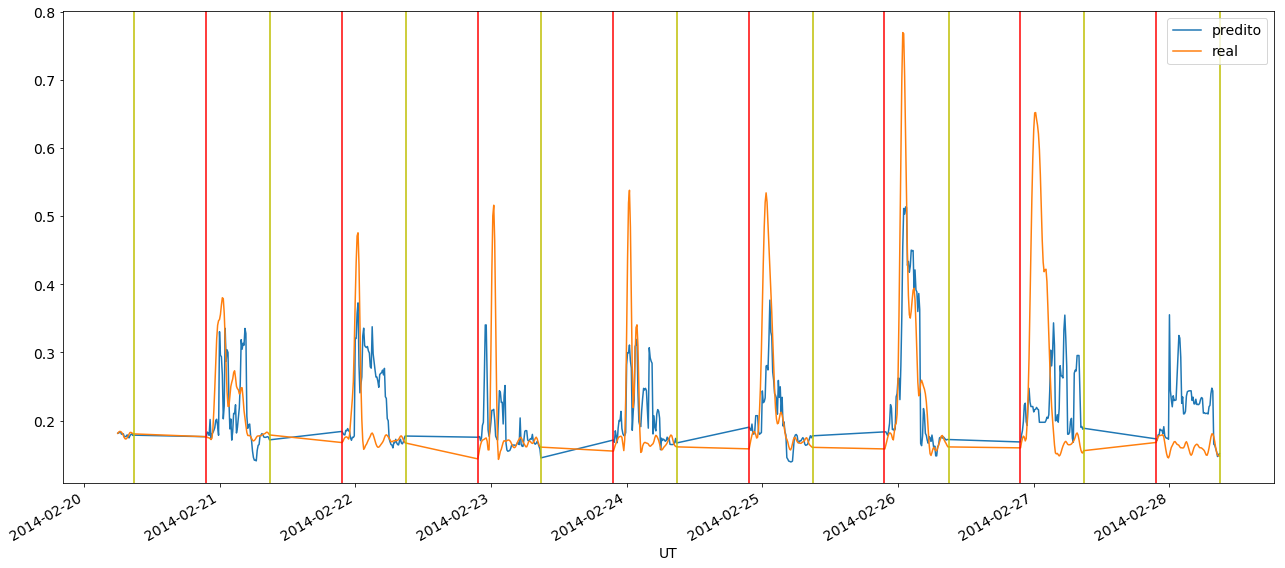


vtec + tempo + lag + mdv1 + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.011079
O erro quadrático total foi: 2.495275
O maior erro por previsão foi: 0.365277
O erro relativo foi: 31.386452%
O número de verdadeiros negativos foi: 265
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 144
O POD foi: 0.797386
O FAR foi: 0.541353
A ACC foi: 0.688612
O kappa foi: 0.081632
precission: 0.458647
recal: 0.797386
f1: 0.582339


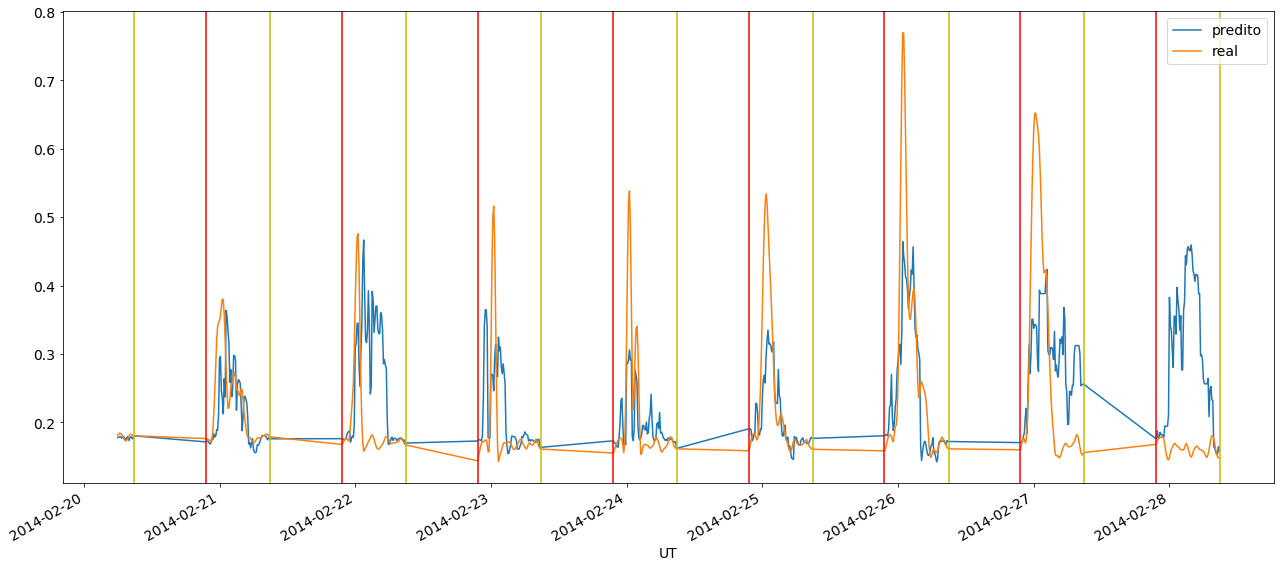

In [6]:
errors = []
for i in set_tests:
    print(i.name)
    dict_error = generate_and_avaliate_model(df=df,
                                            instances_set=list(i.set),
                                            target='s4',
                                            save=True,
                                            file_to_save_model='./images/09_analise_all_cut_0_5/' + i.name + '.eps ',
                                            cut_value=0.5)
    dict_error['name'] = i.name
    errors.append(dict_error)
    print()

In [7]:
df = pd.DataFrame(errors) 
df.index = df['name']
del df['name']
df = df[['tp', 'tn', 'fp', 'fn', 're', 'pod', 'far', 'acc', 'precission', 'recall', 'f1', 'kappa', 'me', 'tse', 'mse']]
pd.set_option('precision', 4)

In [8]:
df

,tp,tn,fp,fn,re,pod,far,acc,precission,recall,f1,kappa,me,tse,mse
name,,,,,,,,,,,,,,,
original,127,280,129,26,23.2562,0.8301,0.5039,0.7242,0.4961,0.8301,0.6210,0.0749,0.4285,2.2455,0.0090
original - vtec,115,235,174,38,26.8665,0.7516,0.6021,0.6228,0.3979,0.7516,0.5204,0.0916,0.4342,2.2791,0.0092
original - vtec_dt,121,295,114,32,22.9198,0.7908,0.4851,0.7402,0.5149,0.7908,0.6237,0.0736,0.4340,2.2684,0.0092
original - gvtec1,121,268,141,32,23.6942,0.7908,0.5382,0.6922,0.4618,0.7908,0.5831,0.0812,0.4186,2.3507,0.0098
original - gvtec1_dt,116,311,98,37,20.6073,0.7582,0.4579,0.7598,0.5421,0.7582,0.6322,0.0724,0.4859,2.2163,0.0087
original - gvtec2,137,226,183,16,27.7935,0.8954,0.5719,0.6459,0.4281,0.8954,0.5793,0.0908,0.5258,2.4170,0.0104
original - gvtec2_dt,123,274,135,30,24.6097,0.8039,0.5233,0.7064,0.4767,0.8039,0.5985,0.0786,0.5319,2.3544,0.0099
original + tempo,117,277,132,36,20.6586,0.7647,0.5301,0.7011,0.4699,0.7647,0.5821,0.0805,0.4644,2.1045,0.0079
original + gvtec1_dt_lag_9,122,261,148,31,22.0927,0.7974,0.5481,0.6815,0.4519,0.7974,0.5768,0.0828,0.4539,2.1463,0.0082
